<a href="https://colab.research.google.com/github/Matheus-Homem/international_bank_marketing/blob/main/notebooks/c2_metrics_and_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Imports

## 0.1. Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
!pip install -U yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics as m
from plotly import express as px

## 0.2. Load Dataset

In [ ]:
df = pd.read_csv('https://github.com/Matheus-Homem/international_bank_marketing/raw/main/data/CC%20GENERAL.csv')

In [ ]:
df.sample().T

,8295
CUST_ID,C18516
BALANCE,190.096
BALANCE_FREQUENCY,1
PURCHASES,561.99
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,561.99
CASH_ADVANCE,0
PURCHASES_FREQUENCY,1
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,1


# 1. Data Description

In [ ]:
df1 = df.copy()

## 1.1. Rename Columns

In [ ]:
df1.columns = list(map(lambda x: x.lower(), df1.columns))

## 1.2. Data Dimensions

In [ ]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 8950
Number of columns: 18


## 1.3. Data Types

In [ ]:
df1.dtypes

cust_id                              object
balance                             float64
balance_frequency                   float64
purchases                           float64
oneoff_purchases                    float64
installments_purchases              float64
cash_advance                        float64
purchases_frequency                 float64
oneoff_purchases_frequency          float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
cash_advance_trx                      int64
purchases_trx                         int64
credit_limit                        float64
payments                            float64
minimum_payments                    float64
prc_full_payment                    float64
tenure                                int64
dtype: object

## 1.4. Check NA

In [ ]:
df1.isna().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

## 1.5. Replace NA

In [ ]:
# remove NA
df1.dropna(inplace=True)
print('Number of rows: {}'.format(df1.shape[0]))
print('Removed data: {:.2f}%'.format(1-(df1.shape[0]/df.shape[0])))

Number of rows: 8636
Removed data: 0.04%


## 1.6. Change dtypes

## 1.7. Descriptive Statistics

# 2. Feature Engineering

In [ ]:
df2 = df1.copy()

## 2.1. Feature Creation

In [ ]:
df2.sample(5).T

,6894,4320,8200,4679,6422
cust_id,C17083,C14440,C18420,C14807,C16598
balance,51.4664,355.324,2692.12,199.462,3169.14
balance_frequency,0.181818,0.636364,1,1,1
purchases,0,284.11,594.7,1296.2,435
oneoff_purchases,0,284.11,594.7,745.82,435
installments_purchases,0,0,0,550.38,0
cash_advance,469.836,855.147,346.334,0,3049.5
purchases_frequency,0,0.166667,0.416667,0.25,0.083333
oneoff_purchases_frequency,0,0.166667,0.416667,0.25,0.083333
purchases_installments_frequency,0,0,0,0.166667,0


In [ ]:
# data reference
df_ref = pd.DataFrame(df2['cust_id'])

# recency
df_ref['recency'] = df2['purchases_frequency']

# frequency
df_ref['frequency'] = df2['purchases_trx']
mms = MinMaxScaler()
df_ref['frequency'] = mms.fit_transform(df_ref[['frequency']].values)

# monetary
df_ref['monetary'] = df2['payments']
df_ref['monetary'] = mms.fit_transform(df_ref[['monetary']].values)

In [ ]:
df_ref.sample(5).T

,1219,7746,8798,807,4437
cust_id,C11263,C17956,C19038,C10836,C14561
recency,0.166667,0,1,1,0.909091
frequency,0.00558659,0,0.027933,0.0977654,0.0698324
monetary,0.0122267,0.0101086,0.00218228,0.038412,0.411526


# 3. Feature Filtering

In [ ]:
df3 = df_ref.copy()

# 4. EDA (Exploratory Data Analysis)

In [ ]:
df4 = df3.copy()

# 5. Data Preparation

In [ ]:
df5 = df4.copy()

# 6. Feature Selection

In [ ]:
df6 = df5.copy()

# 7. Hyperparameter Fine-Tunning

In [ ]:
X = df6.drop('cust_id',axis=1)

In [ ]:
clusters = [2,3,4,5,6,7,8]

In [ ]:
model = KMeans(random_state=101)

## 7.1. Within-Cluster Sum of Square (WSS)

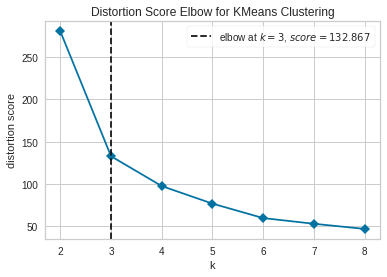

In [ ]:
kmeans = KElbowVisualizer(model,k=clusters, metric='distortion',timings=False)
kmeans.fit(X)
kmeans.show()

## 7.2. Sillhouette Score

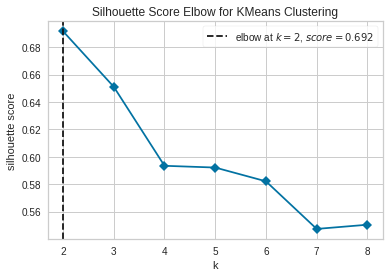

In [ ]:
kmeans = KElbowVisualizer(model,k=clusters, metric='silhouette',timings=False)
kmeans.fit(X)
kmeans.show()

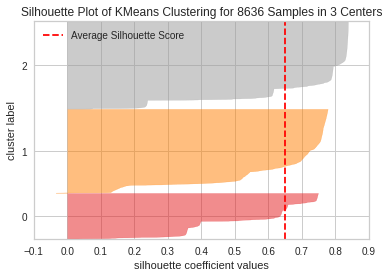

In [ ]:
model = KMeans(3,random_state=101)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)
visualizer.poof() 

## 7.3. Davies Bouldin Score

In [ ]:
davies_list = []

for k in clusters:
  # model definition
  kmeans_model = KMeans(n_clusters=k,random_state=101)

  # model training
  kmeans_model.fit(X)

  # model predict
  labels = kmeans_model.predict(X)

  # model performance
  dav = m.davies_bouldin_score(X, labels)

  davies_list.append(dav)

Text(0, 0.5, 'Davies Boulding Score')

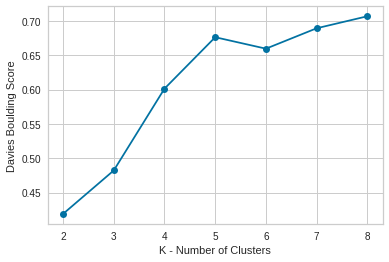

In [ ]:
plt.plot(clusters, davies_list,marker='o')
plt.xlabel('K - Number of Clusters')
plt.ylabel('Davies Boulding Score')

# 8. Model Training

## 8.1. K-Means

In [ ]:
# Model Definition
k = 3
kmeans = KMeans(init='random',n_clusters=k,random_state=101)

# Model Training
kmeans.fit(X)

# Clustering
labels = kmeans.labels_

## 8.2. Cluster Validation

In [ ]:
# WWS (Within-Cluster Sum of Square)
print('WWS value: {:.2f}'.format(kmeans.inertia_))

# SS (Silhouette Score)
print('SS value: {:.2f}'.format(m.silhouette_score(X,labels)))

# Davies Bouldin Score
print('Davies Boulding Score: {:.2f}'.format(davies_list[1]))

WWS value: 132.87
SS value: 0.65
Davies Boulding Score: 0.48


# 9. Cluster Analysis

## 9.1. Visualization Inspection

In [ ]:
df9 = df2[['cust_id','purchases_frequency','purchases_trx','payments']].copy()
df9['cluster'] = labels
df9.head()

,cust_id,purchases_frequency,purchases_trx,payments,cluster
0,C10001,0.166667,2,201.802084,1
1,C10002,0.000000,0,4103.032597,1
2,C10003,1.000000,12,622.066742,2
4,C10005,0.083333,1,678.334763,1
5,C10006,0.666667,8,1400.057770,0


In [ ]:
fig = px.scatter_3d(df9,x='purchases_frequency',y='purchases_trx',z='payments',color='cluster')
fig.show()

## 9.2. Cluster Profile

In [ ]:
# Number of Customers
df_cluster = df9[['cust_id','cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = round(100*(df_cluster['cust_id']/df_cluster['cust_id'].sum()),2)

df_aux = df9[['purchases_frequency','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_aux, how='inner',on='cluster')

df_aux = df9[['purchases_trx','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_aux, how='inner',on='cluster')

df_aux = df9[['payments','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_aux, how='inner',on='cluster')


In [ ]:
df_cluster

,cluster,cust_id,perc_customer,purchases_frequency,purchases_trx,payments
0,0,1819,21.06,0.498311,10.204508,1434.215903
1,1,3471,40.19,0.064133,1.164506,1553.721957
2,2,3346,38.74,0.942745,32.045129,2214.269344


### Cluster 01
- Number of Customers: **3346** (38.74% of customers)
- Frequency of Purchases (from 0 to 1): **0.94**
- Number of Purchases Transactions Made: **32**
- Amount of Payments Done: **$2214.27**

### Cluster 02
- Number of Customers: **1819** (21.06% of customers)
- Frequency of Purchases (from 0 to 1): **0.49**
- Number of Purchases Transactions Made: **10**
- Amount of Payments Done: **$1434.21**

### Cluster 03
- Number of Customers: **3471** (40.19% of customers)
- Frequency of Purchases (from 0 to 1): **0.06**
- Number of Purchases Transactions Made: **1**
- Amount of Payments Done: **$1553.72**

# 10. Deploy to Production